## Importación de las librerías necesarias

In [2]:
import numpy as np
import pandas as pd
import ydata_profiling as ydp
import matplotlib.pyplot as plt
import seaborn as sns
import re
from stop_words import get_stop_words
import stylecloud
from googletrans import Translator
from nltk.stem import PorterStemmer

* Observación: Se llevará a cabo un Análisis Exploratorio de Datos (EDA) inicial que abarcará todos los campos, incluso aquellos que no se utilizarán en la etapa de Machine Learning (ML). Posteriormente, se realizará un proceso de Extracción, Transformación y Carga de Datos (ETL) junto a un EDA específicos, de manera paralela, enfocados para la etapa de ML.

## Carga de datos

In [59]:
df=pd.read_csv(r"https://raw.githubusercontent.com/JersonGB22/ProyectoIndividual1_Henry/main/Datasets/movie_transformation.csv")
# Conversión de la columna 'release_date' a tipo datetime
df["release_date"]=pd.to_datetime(df.release_date)
# Conversión de las columas correspondientes al tipo list
df["genres"]=df.genres.apply(lambda x: eval(x))
df["production_companies"]=df.production_companies.apply(lambda x: eval(x))
df["production_countries"]=df.production_countries.apply(lambda x: eval(x))
df["spoken_languages"]=df.spoken_languages.apply(lambda x: eval(x))

df.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033,81.0,[English],Released,NaN,Toy Story,7.7,1995,12.45
1,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.04
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.00


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45362 entries, 0 to 45361
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4488 non-null   object        
 1   budget                 45362 non-null  int64         
 2   genres                 45362 non-null  object        
 3   id                     45362 non-null  int64         
 4   original_language      45351 non-null  object        
 5   overview               44421 non-null  object        
 6   popularity             45362 non-null  float64       
 7   production_companies   45362 non-null  object        
 8   production_countries   45362 non-null  object        
 9   release_date           45362 non-null  datetime64[ns]
 10  revenue                45362 non-null  int64         
 11  runtime                45116 non-null  float64       
 12  spoken_languages       45362 non-null  object        
 13  s

## EDA General

### Reporte EDA en ydata-profiling

In [10]:
#El EDA de Las columnas del tipo list, se realizarán más adelante
report=ydp.ProfileReport(df.drop(columns=["genres","production_companies","production_countries","spoken_languages"]),
                         title="Reporte EDA: Movie Data")
report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
report.to_file("ReportEDA_MovieData.html")

Render HTML:   0%|          | 0/1 [00:04<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Para ver el EDA de todos los campos con sus conclusiones importantes, visitar el siguiente enlace: [Reporte HTML alojado en Drive to Web](https://huknt1mctoiumyo41mctaq.on.drv.tw/ArchivosHTML/ReportEDA_MovieData.html)**

* Observación: se realizará un EDA más detallado de las variables numéricas y categóricas más importantes

### EDA: Variables numéricas

In [61]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,release_year,return
count,4.536200e+04,45362.000000,45362.000000,4.536200e+04,45116.000000,45362.000000,45362.000000,4.536200e+04
mean,4.233889e+06,108029.075834,2.926390,1.123352e+07,94.179094,5.624185,1991.884176,6.602465e+02
std,1.744240e+07,112176.110950,6.010185,6.439960e+07,38.344699,1.915252,24.052501,7.470482e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26387.250000,0.388850,0.000000e+00,85.000000,5.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59855.000000,1.130454,0.000000e+00,95.000000,6.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156542.500000,3.691065,0.000000e+00,107.000000,6.800000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,2020.000000,1.239638e+07


##### Gráfico de Cajas

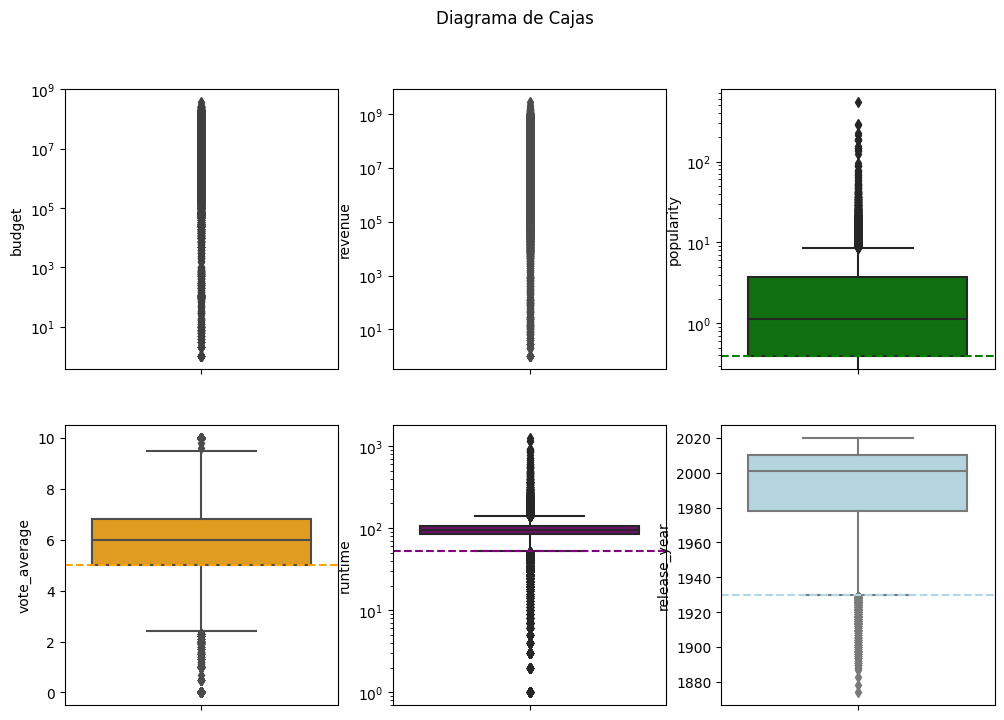

In [62]:
fig,ax=plt.subplots(2,3,figsize=(12,8))
fig.suptitle("Diagrama de Cajas")

sns.boxplot(y="budget",data=df,ax=ax[0,0])
ax[0,0].set(yscale="log")

sns.boxplot(y="revenue",data=df,ax=ax[0,1],color="red")
ax[0,1].set(yscale="log")

sns.boxplot(y="popularity",data=df,ax=ax[0,2],color="green")
ax[0,2].set(yscale="log")
q1_pop=df.popularity.quantile(0.25)
ax[0,2].axhline(y=q1_pop,color="green",linestyle="--")

sns.boxplot(y="vote_average",data=df,ax=ax[1,0],color="#FFA500")
q1_vot=df.vote_average.quantile(0.25)
ax[1,0].axhline(y=q1_vot,color="#FFA500",linestyle="--")

sns.boxplot(y="runtime",data=df,ax=ax[1,1],color="#800080")
ax[1,1].set(yscale="log")
q1_run=df.runtime.quantile(0.25)
q3_run=df.runtime.quantile(0.75)
bi_run=q1_run-1.5*(q3_run-q1_run)
ax[1,1].axhline(y=bi_run,color="#800080",linestyle="--")

sns.boxplot(y="release_year",data=df,ax=ax[1,2],color="#ADD8E6")
q1_rel=df.release_year.quantile(0.25)
q3_rel=df.release_year.quantile(0.75)
bi_rel=q1_rel-1.5*(q3_rel-q1_rel)
ax[1,2].axhline(y=bi_rel,color="#ADD8E6",linestyle="--");

Conclusiones:
* Los campos ``budget`` (presupuesto) y ``revenue`` (ganancia) presentan una gran cantidad de outliers superiores, lo cual causa que estos valores dominen el gráfico y no se aprecien correctamente los diagramas de cajas y bigotes, a pesar de aplicar la escala logarítmica. Esta situación se debe a que la mayoría de los datos en estos campos son iguales a cero, mientras que unos pocos valores correspondientes a ciertas películas tienen ganancias y presupuestos muy altos.
* La columna ``popularity`` presenta valores atípicos superiores, los cuales probablemente corresponden a las películas más exitosas en términos de taquilla. Estos valores atípicos se caracterizan por tener puntajes de popularidad asignados por TMDB (The Movies Database) que superan la media de puntajes.	
* La variable ``runtime`` presenta varios outliers tanto superiores como inferiores, los cuales corresponden a películas con duraciones muy cortas o muy largas. Se observa que el valor mínimo es cero minutos, lo cual puede indicar valores erróneos o corresponder a cortometrajes o trailers que tienen una duración inferior a un minuto (segundos).
* El campo ``release_year`` muestra una cantidad significativa de valores atípicos inferiores, lo que indica la presencia de pocas películas antiguas, aproximadamente anteriores a 1930. Esto se debe a que la gran mayoría de las películas en el conjunto de datos se estrenaron a partir del siglo XXI.

* **OBSERVACIÓN:**  Para mejorar la calidad de datos, el EDA y el sistema de recomendación, así como optimizar el rendimiento del modelo de filtrado de contenido de películas basado en machine learning, se considerarán los registros que sean mayores a las siguientes carcaterísticas:
- Primer cuartil ``popularity``
- Primer cuartil ``vote_average``
- Bigote inferior ``runtime``
- Bigote inferior ``release_year``

Estas condiciones permitirán filtrar y seleccionar películas que sean más populares, bien valoradas, tengan una duración adecuada y sean más recientes. De esta manera, se mejorará la calidad de los datos utilizados en el modelo de recomendación y se optimizará el rendimiento de la PC al reducir la cantidad de registros a procesar.

In [63]:
# Primeros cuartiles y bigotes inferiores
print("Primer cuartil 'popularity': ",q1_pop)
print("Primer cuartil 'vote_average': ",q1_vot)
print("Bigote inferior 'runtime': ",bi_run)
print("Bigote inferior 'release_year': ",bi_rel)

Primer cuartil 'popularity':  0.3888495
Primer cuartil 'vote_average':  5.0
Bigote inferior 'runtime':  52.0
Bigote inferior 'release_year':  1930.0


In [67]:
# Filtrando
# Se considera el doble del primer cuartil de 'popularity' por ser un valor muy pequeño
df=df[(df.popularity>q1_pop*2)&(df.vote_average>q1_vot)&(df.runtime>bi_run)&(df.release_year>bi_rel)].reset_index(drop=True)

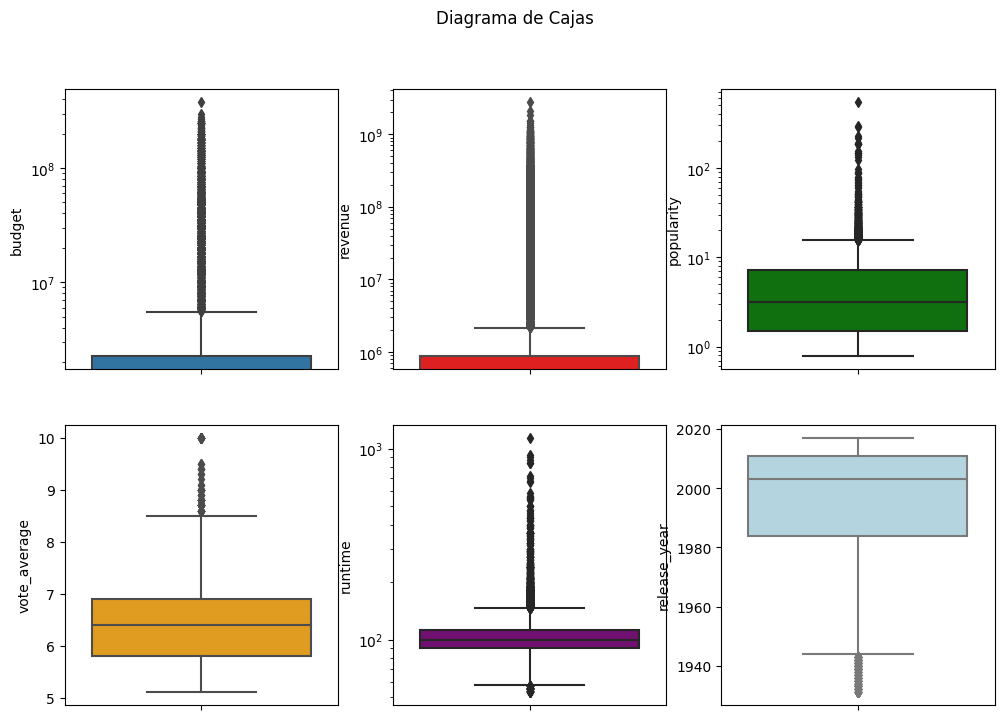

In [69]:
# Visualización del nuevo Diagrama de Cajas
fig,ax=plt.subplots(2,3,figsize=(12,8))
fig.suptitle("Diagrama de Cajas")

sns.boxplot(y="budget",data=df,ax=ax[0,0])
ax[0,0].set(yscale="log")

sns.boxplot(y="revenue",data=df,ax=ax[0,1],color="red")
ax[0,1].set(yscale="log")

sns.boxplot(y="popularity",data=df,ax=ax[0,2],color="green")
ax[0,2].set(yscale="log")

sns.boxplot(y="vote_average",data=df,ax=ax[1,0],color="#FFA500")

sns.boxplot(y="runtime",data=df,ax=ax[1,1],color="#800080")
ax[1,1].set(yscale="log")

sns.boxplot(y="release_year",data=df,ax=ax[1,2],color="#ADD8E6");

Se puede observar que los outliers disminuyeron notoriamente y que los diagramas de cajas se aprecian mucho mejor

##### Histogramas

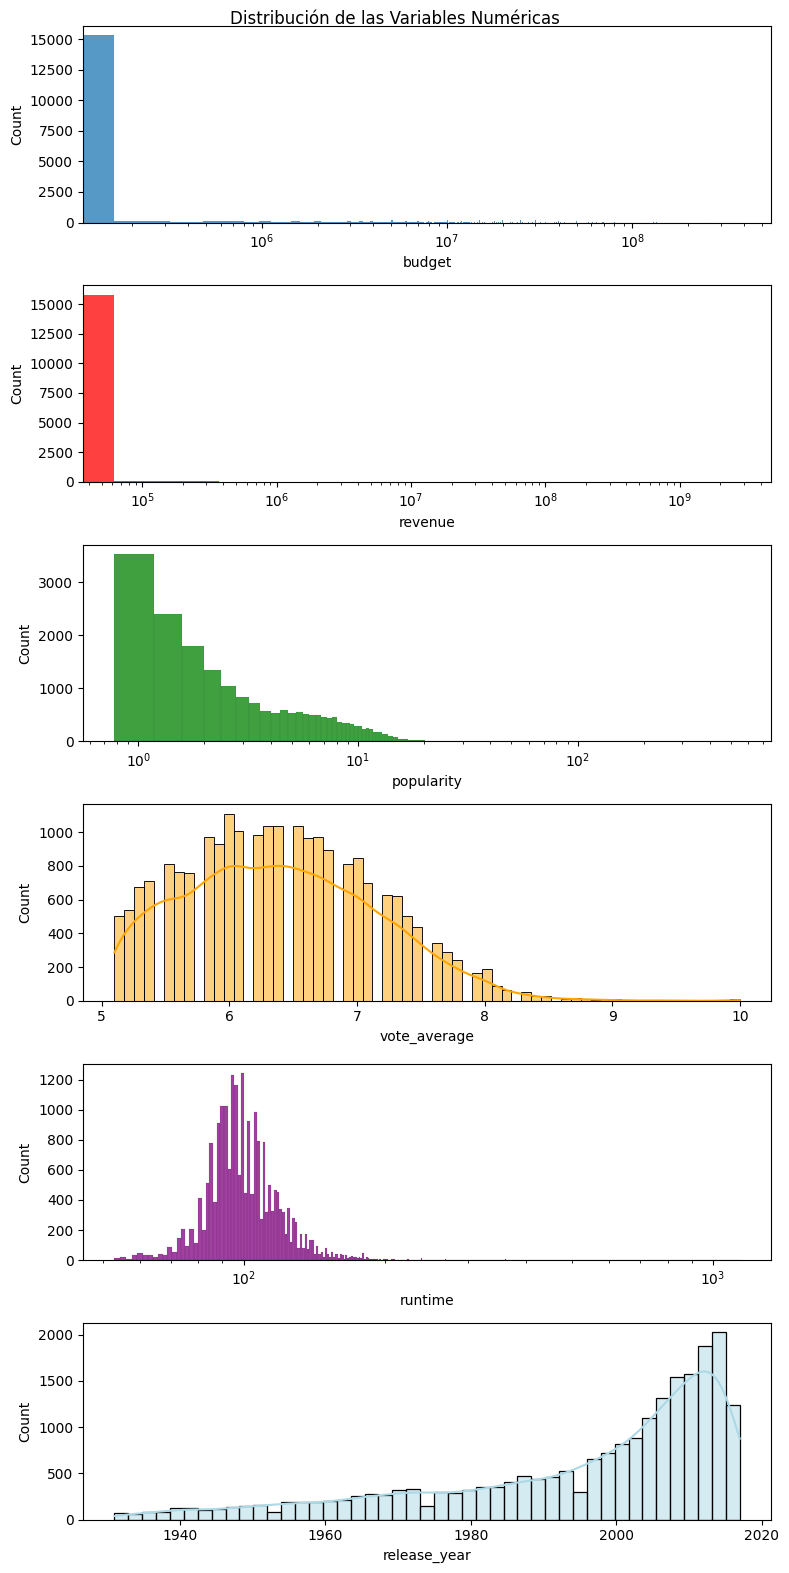

In [70]:
fig,ax=plt.subplots(6,1,figsize=(8,16))
fig.suptitle("Distribución de las Variables Numéricas")
sns.histplot(x="budget",data=df,ax=ax[0])
ax[0].set(xscale="log")
sns.histplot(x="revenue",data=df,ax=ax[1],color="red")
ax[1].set(xscale="log")
sns.histplot(x="popularity",data=df,ax=ax[2],color="green")
ax[2].set(xscale="log")
sns.histplot(x="vote_average",data=df,kde=True,ax=ax[3],color="#FFA500")
sns.histplot(x="runtime",data=df,ax=ax[4],color="#800080")
ax[4].set(xscale="log")
sns.histplot(x="release_year",data=df,kde=True,ax=ax[5],color="#ADD8E6")

plt.tight_layout()

Conclusiones:
* Los histogramas de las variables ``budget``, ``revenue`` y ``popularity`` muestran una distribución sesgada hacia la derecha. Esto se debe a que la mayoría de los valores en estas variables están cerca de cero, mientras que solo unos pocos tienen valores altos.
* Los histogramas de las columnas ``vote_average`` y ``runtime`` muestran una distribución multimodal semejante a una simétrica. Esto indica que una gran cantidad de valores en ambas variables se aglomeran cerca de su media.
* Por último, se observa un sesgo hacia la izquierda en el histograma del campo ``release_year``, lo cual confirma la conclusión previa obtenida a partir de su gráfico de cajas.

##### Heatmap

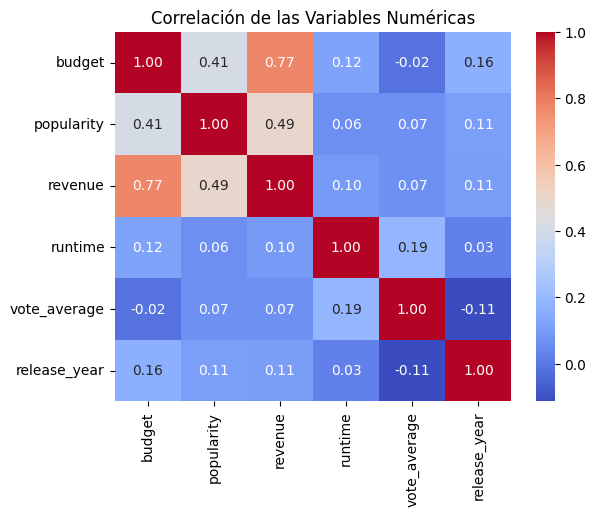

In [71]:
sns.heatmap(df.drop(columns=["id","return"]).corr(numeric_only=True),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlación de las Variables Numéricas");

Conclusión: 
* Las variables `budget` y `revenue` tienen una alta correlación positiva (0.77), indicando que las películas con mayores presupuestos tienden a generar mayores ganancias. Por otro lado, la correlación de 0.41 entre `budget` y `popularity` muestra una correlación positiva, aunque más débil, lo que implica que películas con presupuestos más altos tienden a tener puntajes de popularidad ligeramente superiores. Además, la correlación de 0.49 entre `revenue` y `popularity` indica una correlación positiva moderada, sugiriendo que películas con altas ganancias también tienden a tener mayores puntajes de popularidad.

### EDA: Variables categóricas

##### Countplot

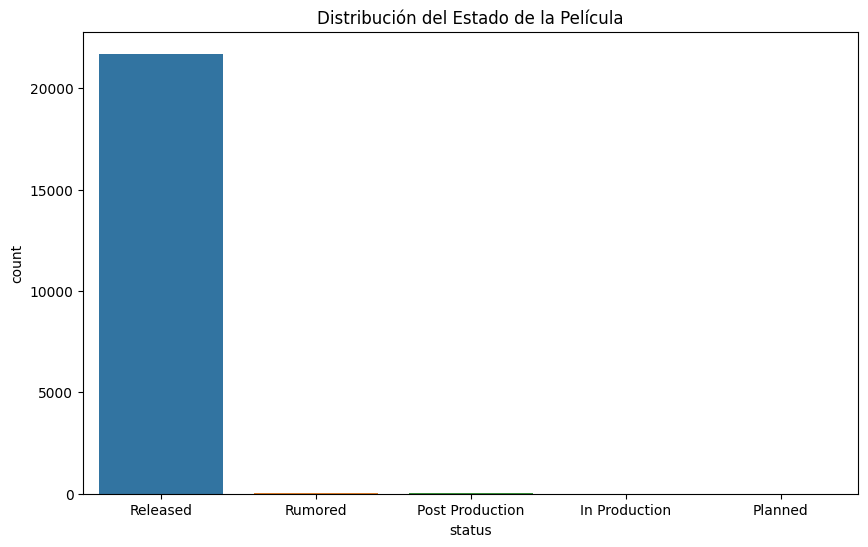

In [72]:
plt.figure(figsize=(10,6))
plt.title("Distribución del Estado de la Película")
sns.countplot(data=df,x="status");

Se observa que la categoría ``released``, que representa a las películas disponibles, abarca prácticamente todos los registros de la columna ``status``.

## ETL: Machine Learning

* Observación: 
En un sistema de recomendación de películas basado en filtro de contenido, el cual nos encomiendan para la etapa de ML, no se necesitan variables numéricas debido a que este enfoque se basa en el análisis de características y atributos no numéricos de las películas. El filtro de contenido se centra en comprender los atributos y características inherentes de las películas, como su género, director, elenco, trama, palabras clave o etiquetas asociadas, entre otros. Estos aspectos se utilizan para establecer perfiles o descripciones de las películas, lo que permite recomendar películas similares en función de las preferencias del usuario. 

#### Selección de las columnas relevantes para ML

In [73]:
df=df[["title","genres","overview","production_companies","production_countries","spoken_languages"]]
df.head(3)

,title,genres,overview,production_companies,production_countries,spoken_languages
0,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",[Pixar Animation Studios],[United States of America],[English]
1,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"
2,Grumpier Old Men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"[Warner Bros., Lancaster Gate]",[United States of America],[English]


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21806 entries, 0 to 21805
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 21806 non-null  object
 1   genres                21806 non-null  object
 2   overview              21741 non-null  object
 3   production_companies  21806 non-null  object
 4   production_countries  21806 non-null  object
 5   spoken_languages      21806 non-null  object
dtypes: object(6)
memory usage: 1022.3+ KB


#### Inputación de los Valores Faltantes en `overview`

Los nulos de este campo se inputarán con cadenas vacías (""), ya que esto permite al modelo considerar la ausencia de información como una característica adicional. Además, las cadenas vacías son manejadas naturalmente por modelos de procesamiento de lenguaje natural como CountVectorizer, que veremos más adelante, mientras que "unknown" puede ser interpretado como una categoría real y confundir al modelo, llevando a resultados menos precisos.

In [75]:
df.overview.fillna("",inplace=True)

#### Preprocesamiento de Texto

In [76]:
# Conversión de todos los campos a minúsculas
df["title"]=df.title.apply(lambda x: x.lower())
df["overview"]=df.overview.apply(lambda x: x.lower())

df["genres"]=df.genres.apply(lambda x: [i.lower() for i in x])
df["production_companies"]=df.production_companies.apply(lambda x: [i.lower() for i in x])
df["production_countries"]=df.production_countries.apply(lambda x: [i.lower() for i in x])
df["spoken_languages"]=df.spoken_languages.apply(lambda x: [i.lower() for i in x])

# Visualizando el resultado
df.head(3)

,title,genres,overview,production_companies,production_countries,spoken_languages
0,toy story,"[animation, comedy, family]","led by woody, andy's toys live happily in his ...",[pixar animation studios],[united states of america],[english]
1,jumanji,"[adventure, fantasy, family]",when siblings judy and peter discover an encha...,"[tristar pictures, teitler film, interscope co...",[united states of america],"[english, français]"
2,grumpier old men,"[romance, comedy]",a family wedding reignites the ancient feud be...,"[warner bros., lancaster gate]",[united states of america],[english]


* Para el sistema de recomendación de películas con filtro de contenido, es recomendable eliminar los signos de puntuación, así como también eliminar las palabras irrelevantes como artículos, conjunciones y preposiciones, etc, ya que no aportan información relevante al contenido de la película.

In [77]:
# Implementando una función que realize el trabajo antes descrito
def preprocess_text(text):
    #Eliminación de los signos de puntuación utilizando con la librería regex
    text=re.sub(r"[^\w\s]","",text)
    #Eliminación de las palabras irrelevantes utilizando la librería stop_words
    stop_word=get_stop_words("english")
    text=text.split()
    text=[word for word in text if word not in stop_word]
    return text

In [78]:
# Aplicando la función a la variable overview
df["overview"]=df.overview.apply(preprocess_text)
# También de manera dicional se considera un nuevo campo en base a 'title' para mejorar el modelo de ML
df["name_movie"]=df.title.apply(preprocess_text)

#Visualizando el resultado
df.head(3)

,title,genres,overview,production_companies,production_countries,spoken_languages,name_movie
0,toy story,"[animation, comedy, family]","[led, woody, andys, toys, live, happily, room,...",[pixar animation studios],[united states of america],[english],"[toy, story]"
1,jumanji,"[adventure, fantasy, family]","[siblings, judy, peter, discover, enchanted, b...","[tristar pictures, teitler film, interscope co...",[united states of america],"[english, français]",[jumanji]
2,grumpier old men,"[romance, comedy]","[family, wedding, reignites, ancient, feud, ne...","[warner bros., lancaster gate]",[united states of america],[english],"[grumpier, old, men]"


* Antes de continuar con el Stemming para convertir las palabras a su forma base, se presenta el respectivo EDA para la etapa de ML.

### ***EDA: Machine Learning***

#### Barplot: Géneros de películas

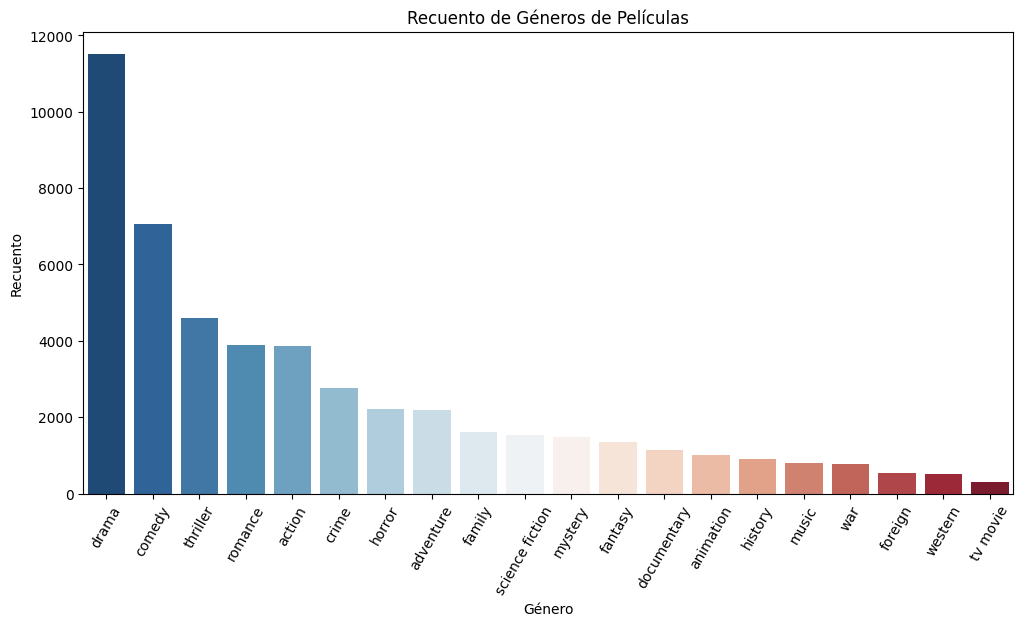

In [79]:
top_genre=df.genres.explode().value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=top_genre.index,y=top_genre,palette='RdBu_r')
plt.xlabel('Género')
plt.ylabel('Recuento')
plt.title('Recuento de Géneros de Películas')
plt.xticks(rotation=60);

#### Barplot: Compañías Productoras de Películas

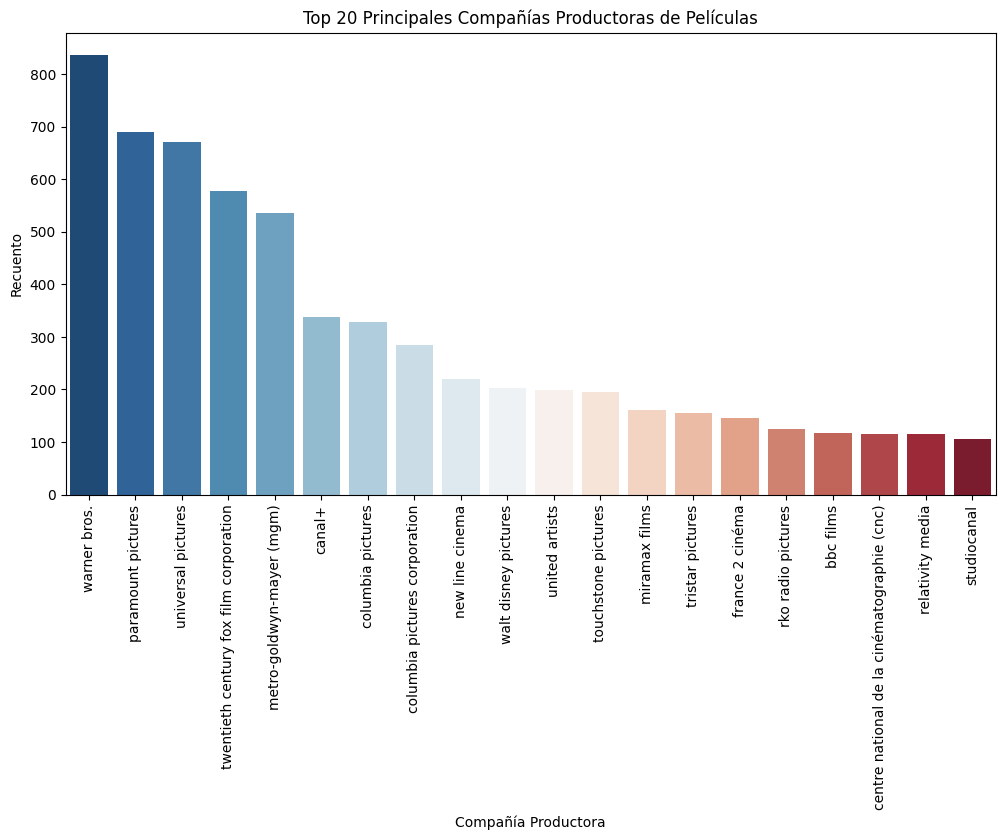

In [80]:
top_company=df.production_companies.explode().value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_company.index,y=top_company,palette='RdBu_r')
plt.xlabel('Compañía Productora')
plt.ylabel('Recuento')
plt.title('Top 20 Principales Compañías Productoras de Películas')
plt.xticks(rotation=90);

#### Barplot: Países de Producción de Películas

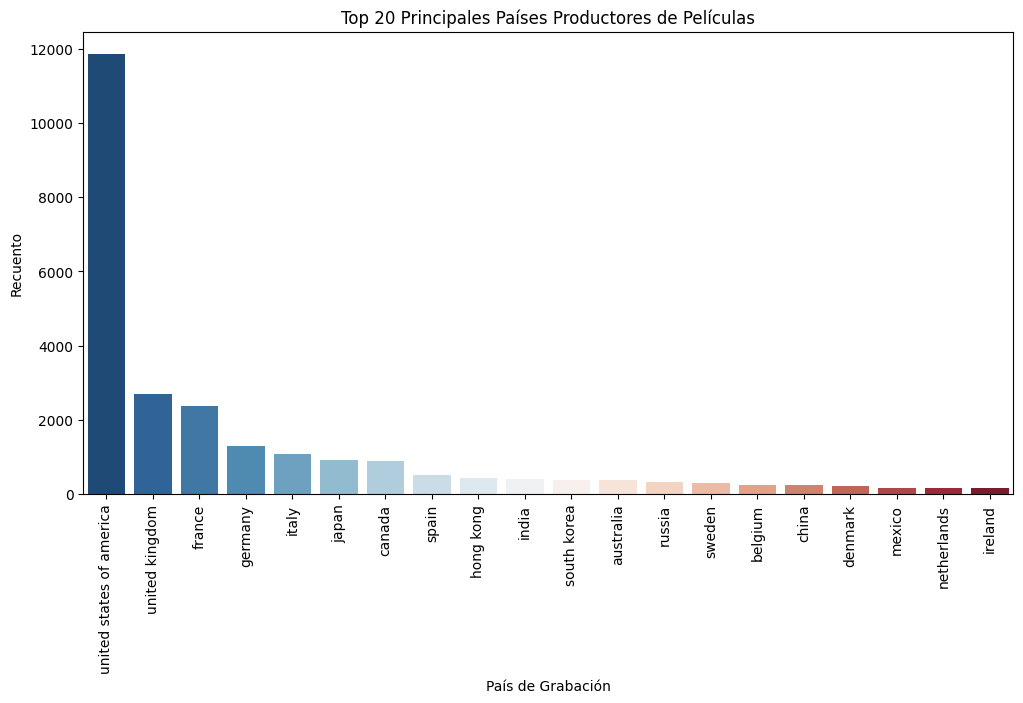

In [81]:
top_country=df.production_countries.explode().value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_country.index,y=top_country,palette='RdBu_r')
plt.xlabel('País de Grabación')
plt.ylabel('Recuento')
plt.title('Top 20 Principales Países Productores de Películas')
plt.xticks(rotation=90);

#### Barplot: Idiomas de Grabación de Películas

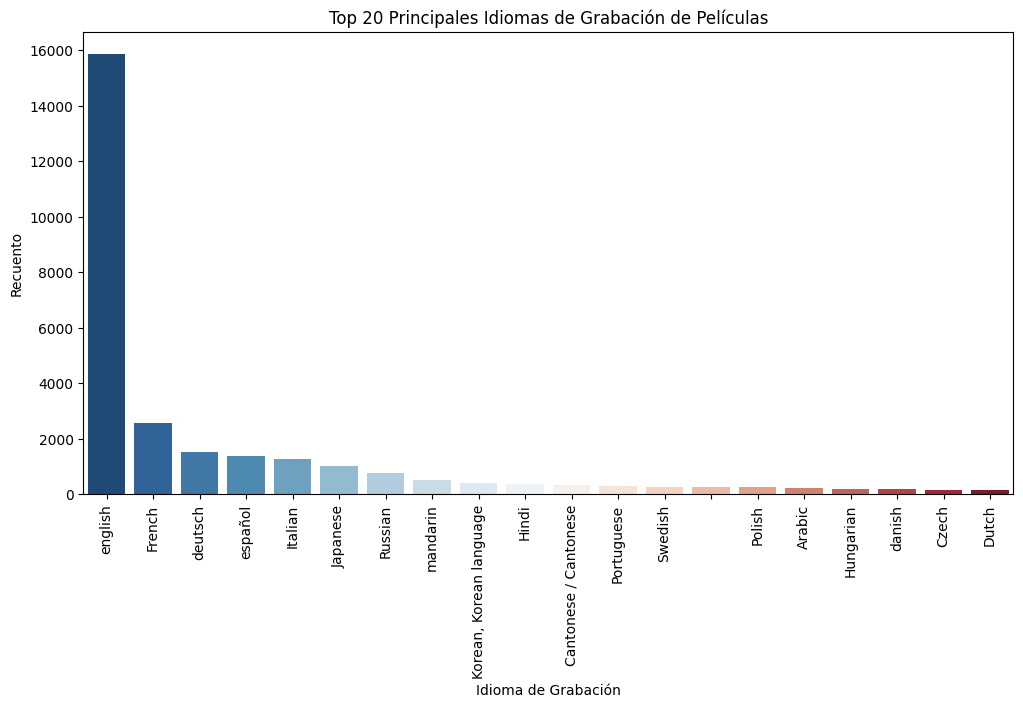

In [83]:
top_language=df.spoken_languages.explode().value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_language.index.map(lambda x: Translator().translate(x,dest="en").text),
            y=top_language,palette='RdBu_r')
plt.xlabel('Idioma de Grabación')
plt.ylabel('Recuento')
plt.title('Top 20 Principales Idiomas de Grabación de Películas')
plt.xticks(rotation=90);

#### Word Cloud: Sinopsis de Películas

In [84]:
# Creamos una variable donde estén unidas todas las palabras de todas las filas de la columna 'overview'
text=" ".join(df.overview.str.join(" "))
# Generamos una imagen que contenga las palabras que más se repiten en la columna 'overview'
stylecloud.gen_stylecloud(text=text,
                          icon_name="fas fa-cloud",
                          background_color="black",
                          output_name="overview_wordcloud.png")

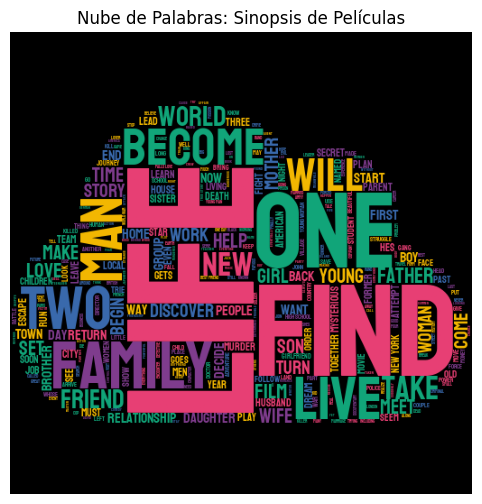

In [85]:
image=plt.imread('Datasets/overview_wordcloud.png')
plt.figure(figsize=(8,6))
plt.title("Nube de Palabras: Sinopsis de Películas")
plt.imshow(image)
plt.axis('off');

#### Word Cloud: Títulos de Películas

In [86]:
text=" ".join(df.name_movie.str.join(" "))
stylecloud.gen_stylecloud(text=text,
                          icon_name="fas fa-cloud",
                          background_color="black",
                          output_name="title_wordcloud.png")

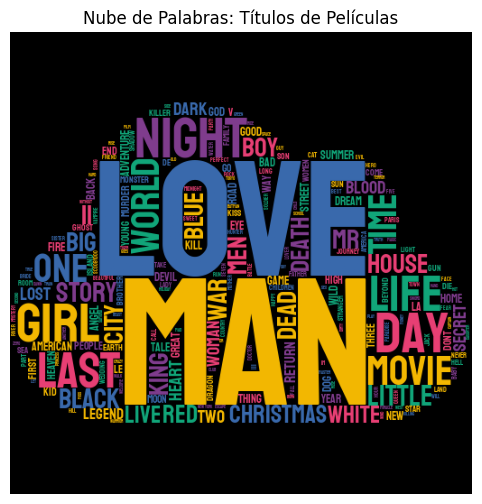

In [87]:
image=plt.imread('Datasets/title_wordcloud.png')
plt.figure(figsize=(8,6))
plt.title("Nube de Palabras: Títulos de Películas")
plt.imshow(image)
plt.axis('off');

* Continuamos con el Preprocesamiento de Texto para ML

### Stemming

El stemming es un proceso lingüístico que consiste en reducir las palabras a su raíz, eliminando así los sufijos y prefijos. Se aplica para normalizar y estandarizar las palabras en un texto, lo que facilita su análisis y procesamiento en diversas tareas del procesamiento de lenguaje natural, como la clasificación de textos o la búsqueda de información. También ayuda a reducir el tamaño del vocabulario y a mejorar la eficiencia de los algoritmos de aprendizaje automático utilizados en los sistemas de recomendación de películas con filtro de contenido.

In [88]:
# Creación de una nueva columna 'label' que combine todas las características de las películas
df["label"]=df.name_movie+df.genres+df.overview+df.production_companies+df.production_countries+df.spoken_languages
# Realizamos unnuevo marco de referencia solo con 'title' y 'label'
df=df[["title","label"]]
df.head(3)

,title,label
0,toy story,"[toy, story, animation, comedy, family, led, w..."
1,jumanji,"[jumanji, adventure, fantasy, family, siblings..."
2,grumpier old men,"[grumpier, old, men, romance, comedy, family, ..."


In [89]:
# Convirtiendo la columna 'label' a string
df["label"]=df.label.str.join(" ")
df.head(3)

,title,label
0,toy story,toy story animation comedy family led woody an...
1,jumanji,jumanji adventure fantasy family siblings judy...
2,grumpier old men,grumpier old men romance comedy family wedding...


##### Aplicando Stemming en la columna label

In [90]:
ps=PorterStemmer()
df["label"]=df.label.apply(lambda text: " ".join([ps.stem(word) for word in text.split()]))
df

,title,label
0,toy story,toy stori anim comedi famili led woodi andi to...
1,jumanji,jumanji adventur fantasi famili sibl judi pete...
2,grumpier old men,grumpier old men romanc comedi famili wed reig...
3,waiting to exhale,wait exhal comedi drama romanc cheat mistreat ...
4,father of the bride part ii,father bride part ii comedi just georg bank re...
...,...,...
21801,the sublet,sublet mysteri drama thriller horror sublet su...
21802,cadet kelly,cadet kelli comedi hyperact teenag kelli enrol...
21803,pooh's heffalump halloween movie,pooh heffalump halloween movi anim famili hall...
21804,mom,mom crime drama thriller bliss biolog teacher ...


### Exportación del data frame resultante para la etapa de Machine Learning

In [56]:
df.to_csv("ML_movie_transformation.csv",index=False)

---